---
title: "Mountain Classifier 🏔"
description: "A simple classifier to distinguish mountains using fastai."
author: "Sasipim"
date: "2025-10-20"
image: "./../images/matterhorn.jpg"
categories:
    - fastai
---



# Mountain classifier

Inspired by [fastai lesson1](https://course.fast.ai/Lessons/lesson1.html), I want to create an image classifier. I love travelling and I think it will be challenging for a model to classify similar-looking mountains. So, I chose the Matterhorn, my favourite mountain. I searched the internet and found Mount Assiniboine, the Matterhorn of the Rockies.

## The Matterhorn vs Mount Assiniboine

In [28]:
#| include: false

!pip uninstall numpy scipy fastai torch torchvision ddgs duckduckgo_search -y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: fastai 2.7.12
Uninstalling fastai-2.7.12:
  Successfully uninstalled fastai-2.7.12
Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchvision 0.15.2
Uninstalling torchvision-0.15.2:
  Successfully uninstalled torchvision-0.15.2
Found existing installation: ddgs 9.6.1
Uninstalling ddgs-9.6.1:
  Successfully uninstalled ddgs-9.6.1


In [29]:
#| include: false
!pip install "numpy<2"

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, which is not installed.
libpysal 4.9.2 requires scipy>=1.8, which is not installed.
treelite 4.4.1 requires scipy, which is not installed.
cuml-cu12 25.2.1 requires scipy>=1.8.0, which is not installed.
woodwork 0.31.0 requires scipy>=1.10.0, which is not installed.
boruta 0.4.3 requires scipy>=0.17.0, which is not installed.
scikit-surprise 1.1.4 requires scipy>=1.6.0, which is not installed.
torchmetrics 1.8.2 requires torch>=2.0.0, which is not installed.
featuretools 1.31.0 requires scipy>=1.10.0, which is not installed.
plotly-express 0.4.1 requires scipy>=0.18, which is

In [30]:
#| include: false
!pip install scipy==1.10.1

  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.7.2 requires torch, which is not installed.
easyocr 1.7.2 requires torchvision>=0.5, which is not installed.
sentence-transformers 4.1.0 requires torch>=1.11.0, which is not installed.
mne 1.10.1 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
kaggle-environments 1.18.0 requires scipy>=1.11.2, but you have scipy 1.10.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have

In [31]:
#| include: false
!pip install torch==1.13.1 torchvision==0.14.1

  Using cached torch-1.13.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.14.1 (from versions: 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.24.0)
ERROR: No matching distribution found for torchvision==0.14.1


In [32]:
#| include: false
!pip install fastai==2.7.12 ddgs

  Using cached fastai-2.7.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached ddgs-9.6.1-py3-none-any.whl.metadata (18 kB)
  Using cached torchvision-0.24.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (5.9 kB)
  Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached torchvision-0.23.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.22.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.22.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.20.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.20.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.19.

### Step 1: Download images

In [7]:
from ddgs import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

To make it more challenging, I chose winter images. That way, the mountains are covered with snow and look more similar.

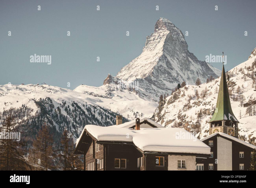

In [10]:
from fastdownload import download_url
from fastai.vision.all import *

download_url(search_images('matterhorn in winter', max_images=1)[0], 'matterhorn.jpg', show_progress=False)
Image.open('matterhorn.jpg').to_thumb(256,256)

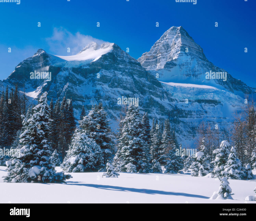

In [11]:
download_url(search_images('assiniboine in winter', max_images=1)[0], 'assiniboine.jpg', show_progress=False)
Image.open('assiniboine.jpg').to_thumb(256,256)

Those mountains look similar👍🏻. Next, I downloaded more images and saved them at `/mountains/matterhorn` and `/mountains/assiniboine`.

In [12]:
searches = 'matterhorn','assiniboine'
path = Path('mountains')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} in winter'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

Next, I verified images and removed corrupted images.

In [13]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

Next, I used `DataBlock` to create `DataLoaders` and viewed sample images from it.

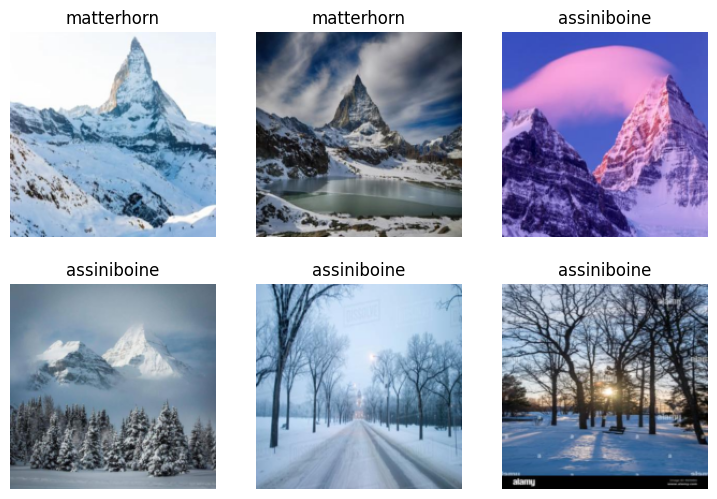

In [19]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

### Step 2: Train the model

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.326607,0.827004,0.411765,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.460767,0.435698,0.235294,00:21
1,0.308592,0.249649,0.088235,00:21
2,0.224121,0.258147,0.117647,00:21
3,0.180325,0.252384,0.117647,00:21
4,0.144590,0.231590,0.117647,00:21


### Step 3: Use the model for prediction

In [25]:
is_matterhorn,_,probs = learn.predict(PILImage.create('matterhorn.jpg'))
print(f"This is a: {is_matterhorn}.")
print(f"Probability it's a matterhorn: {probs[0]:.4f}")

This is a: matterhorn.
Probability it's a matterhorn: 0.0000


In [26]:
is_matterhorn,_,probs = learn.predict(PILImage.create('assiniboine.jpg'))
print(f"This is a: {is_matterhorn}.")
print(f"Probability it's a assiniboine: {probs[1]:.4f}")

This is a: matterhorn.
Probability it's a assiniboine: 0.6165


The result was confusing at first. For the Matterhorn image, the model predicted that it was the Matterhorn, but the probability that it's the Matterhorn is 0. Also, for the Mount Assiniboine image, the model predicted that it was the Matterhorn, but the probability that it's Mount Assiniboine is 0.6165.

I thought class 0 was Matterhorn and class 1 was Assiniboine since I downloaded the Matterhorn images first. However, after reading the [fastai doc](https://docs.fast.ai/data.block.html#categoryblock) and discovering that the `CategoryBlock` sorts classes alphabetically if not specified. That's why class 0 is Assiniboine and class 1 is Matterhorn. 

We can check the class index and class name mapping by using the `vocab` attribute of the `DataLoaders`

In [49]:
print(f"Class names: {dls.vocab}")

Class names: ['assiniboine', 'matterhorn']


So I fixed the code using the class index and label from the `vocab`

In [51]:
for i, class_name in enumerate(dls.vocab):
    mountain_name,_,probs = learn.predict(PILImage.create(f"{class_name}.jpg"))
    print(f"This is a: {class_name}.")
    print(f"Model predicts that it is a: {mountain_name}.")
    print(f"Probability it's a {class_name}: {probs[i]:.4f}\n")

This is a: assiniboine.
Model predicts that it is a: matterhorn.
Probability it's a assiniboine: 0.3835



This is a: matterhorn.
Model predicts that it is a: matterhorn.
Probability it's a matterhorn: 1.0000



But if we want class 0 to be Matterhorn and class 1 to be Assiniboine, we can pass the class name to the `vocab` of the `CategoryBlock` and set `sort=False`.

In [45]:
dls2 = DataBlock(
    blocks=(ImageBlock, CategoryBlock(vocab=['matterhorn', 'assiniboine'], sort=False)),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

In [46]:
print(f"Class names: {dls2.vocab}")

Class names: ['matterhorn', 'assiniboine']


However, the model's result is not good enough. It predicted wrong, so I will fine-tune it more.

In [52]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.013699,0.264133,0.117647,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.013848,0.313575,0.117647,00:14
1,0.010381,0.432843,0.147059,00:13
2,0.013321,0.674214,0.235294,00:13
3,0.010601,0.601326,0.205882,00:13
4,0.009109,0.330560,0.117647,00:13


In [53]:
for i, class_name in enumerate(dls.vocab):
    mountain_name,_,probs = learn.predict(PILImage.create(f"{class_name}.jpg"))
    print(f"This is a: {class_name}.")
    print(f"Model predicts that it is a: {mountain_name}.")
    print(f"Probability it's a {class_name}: {probs[i]:.4f}\n")

This is a: assiniboine.
Model predicts that it is a: assiniboine.
Probability it's a assiniboine: 0.9114



This is a: matterhorn.
Model predicts that it is a: matterhorn.
Probability it's a matterhorn: 0.9913



Better. It predicted correctly this time🎉.

## Multiclass Classification

To make it more challenging, I want a model that can classify many mountains.

### Step 1: Download images

I downloaded two more mountain images: Mont Blanc and Titlis.

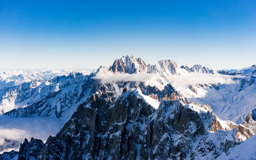

In [54]:
download_url(search_images('mont blanc in winter', max_images=1)[0], 'mont blanc.jpg', show_progress=False)
Image.open('mont blanc.jpg').to_thumb(256,256)

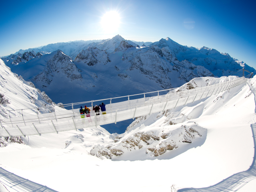

In [55]:
download_url(search_images('titlis in winter', max_images=1)[0], 'titlis.jpg', show_progress=False)
Image.open('titlis.jpg').to_thumb(256,256)

Then, I downloaded and saved the new images in the same parent folder `/mountains`.

```
└── mountains/
    ├── matterhorn/
    ├── assiniboine/
    ├── mont blanc/ 
    └── titlis/
```

The rest is the same as binary classification above.

In [56]:
searches = 'mont blanc','titlis'
path = Path('mountains')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} in winter'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [57]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

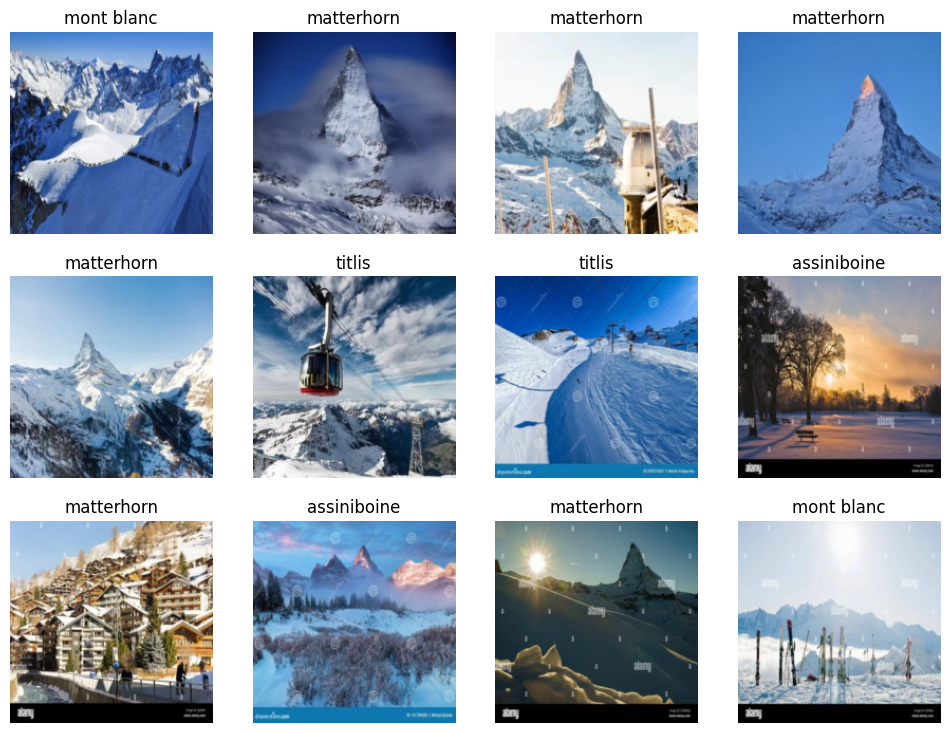

In [58]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

### Step 2: Train the model

In [60]:
learn = vision_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.270211,1.331686,0.485714,02:05


epoch,train_loss,valid_loss,error_rate,time
0,0.645704,0.985022,0.342857,02:53
1,0.422413,0.975001,0.271429,03:01
2,0.340291,0.947498,0.257143,02:53
3,0.259572,0.723719,0.200000,02:55
4,0.203068,0.686363,0.185714,02:57


### Step 3: Use the model for prediction

In [61]:
for i, class_name in enumerate(dls.vocab):
    mountain_name,_,probs = learn.predict(PILImage.create(f"{class_name}.jpg"))
    print(f"This is a: {class_name}.")
    print(f"Model predicts that it is a: {mountain_name}.")
    print(f"Probability it's a {class_name}: {probs[i]:.4f}\n")

This is a: assiniboine.
Model predicts that it is a: mont blanc.
Probability it's a assiniboine: 0.3844



This is a: matterhorn.
Model predicts that it is a: matterhorn.
Probability it's a matterhorn: 1.0000



This is a: mont blanc.
Model predicts that it is a: mont blanc.
Probability it's a mont blanc: 1.0000



This is a: titlis.
Model predicts that it is a: titlis.
Probability it's a titlis: 0.9990



Not bad. Correct 3/4.

In [62]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.046293,0.733727,0.200000,02:09


epoch,train_loss,valid_loss,error_rate,time
0,0.027783,0.858846,0.185714,02:56
1,0.038438,1.451459,0.242857,03:03
2,0.151360,1.095311,0.200000,02:50
3,0.185351,1.092717,0.157143,02:52
4,0.166083,0.955429,0.157143,02:51


In [63]:
for i, class_name in enumerate(dls.vocab):
    mountain_name,_,probs = learn.predict(PILImage.create(f"{class_name}.jpg"))
    print(f"This is a: {class_name}.")
    print(f"Model predicts that it is a: {mountain_name}.")
    print(f"Probability it's a {class_name}: {probs[i]:.4f}\n")

This is a: assiniboine.
Model predicts that it is a: assiniboine.
Probability it's a assiniboine: 0.8058



This is a: matterhorn.
Model predicts that it is a: matterhorn.
Probability it's a matterhorn: 1.0000



This is a: mont blanc.
Model predicts that it is a: mont blanc.
Probability it's a mont blanc: 1.0000



This is a: titlis.
Model predicts that it is a: titlis.
Probability it's a titlis: 1.0000



The model did an impressive job. Well done! 👏🏻